In [1]:
import os
from pathlib import Path
import numpy as np
import mne

# Use neurodsp for convenience
from neurodsp.plts import plot_time_series, plot_power_spectra
from neurodsp.spectral import compute_spectrum

import matplotlib.pyplot as plt
# Import fooof for checking model fits
from fooof import FOOOF
from fooof import FOOOFGroup

 # SET PSD calculation and FOOOF PARAMETERS

In [2]:
f_min = 1
f_max = 45
t     = 15
fs    = 200
SETTINGS_W  = { 'method' : 'welch', 'average' : 'mean', 'fmin' :f_min , 'fmax':f_max, 'n_fft': fs*t, 'n_overlap': fs*t*0.5}

SETTINGS_F1={'max_n_peaks':8, 'aperiodic_mode':'knee'}


# Set the vectors to store the results

In [3]:
W_Kn  = np.zeros([len(regions)-4,25])*np.nan
W_Exp = np.zeros([len(regions)-4,25])*np.nan

N1_Kn  = np.zeros([len(regions)-4,25])*np.nan
N1_Exp = np.zeros([len(regions)-4,25])*np.nan

N2_Kn  = np.zeros([len(regions)-4,25])*np.nan
N2_Exp = np.zeros([len(regions)-4,25])*np.nan

N3_Kn  = np.zeros([len(regions)-4,25])*np.nan
N3_Exp = np.zeros([len(regions)-4,25])*np.nan

R_Kn  = np.zeros([len(regions)-4,25])*np.nan
R_Exp = np.zeros([len(regions)-4,25])*np.nan


NameError: name 'regions' is not defined

# WAKEFULNESS

In [ ]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'Wakefulness_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))


In [85]:
axes = iter(make_axes(20, 5, figsize=(15, 20))) # custom function for subplotting

i =0 
for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
        
    EEG = mne.io.read_raw_edf(data_path / dataset / R)
    EEG_psd = EEG_seg.compute_psd(**SETTINGS_W)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])

    plt.yscale("log")
    plt.xscale("log")
    plt.plot(np.mean(EEG_psd._data,0))
    plt.plot(np.mean(np.mean(EEG_psd._data,0),0))
    
    # parameters exctract
    W_Kn[i,:]  = fm1.get_params('aperiodic_params','knee')
    W_Exp[i,:] = fm1.get_params('aperiodic_params','exponent')

    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Triangular part of inferior frontal gyrus_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Loading data for 25 events and 4000 original time points ...
Effective window size : 15.000 (s)
Running FOOOFGroup across 47 power spectra.


KeyboardInterrupt: 

In [86]:
EEG = mne.io.read_raw_edf(data_path / dataset / R)
    
EEG_psd = EEG_seg.compute_psd(**SETTINGS_W)

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Triangular part of inferior frontal gyrus_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Loading data for 25 events and 4000 original time points ...
Effective window size : 15.000 (s)


In [68]:
np.shape(EEG_psd._data)

(25, 47, 674)

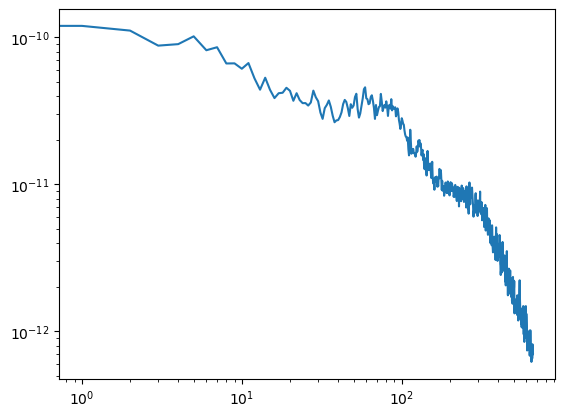

In [87]:
plt.yscale("log")
plt.xscale("log")
plt.plot(np.mean(np.mean(EEG_psd._data,0),0))

In [79]:
np.shape(np.mean(np.mean(EEG_psd._data,0),0))

(674,)

In [81]:
EEG_psd.__dict__

{'_sfreq': 200.0,
 '_inst_type': mne.epochs.Epochs,
 'info': <Info | 7 non-empty values
  bads: []
  ch_names: GD006Rq5W, GD006Rq6W, GD006Rq7W, GD008Lq_5W, GD018Lq_03W, ...
  chs: 47 EEG
  custom_ref_applied: False
  highpass: 0.0 Hz
  lowpass: 100.0 Hz
  meas_date: 1970-01-01 00:00:00 UTC
  nchan: 47
  projs: []
  sfreq: 200.0 Hz
 >,
 'preload': True,
 '_method': 'welch',
 '_dims': ('epoch', 'channel', 'freq'),
 '_data_type': 'Power Spectrum',
 '_data': array([[[7.13843090e-10, 1.78505406e-12, 6.97959782e-11, ...,
          1.52990651e-13, 2.64584720e-14, 1.79074805e-13],
         [1.00515895e-10, 4.39362966e-11, 7.03938717e-12, ...,
          1.05791179e-12, 1.93739849e-13, 2.13629191e-13],
         [4.20616572e-10, 5.84743221e-10, 6.27834178e-10, ...,
          4.61740924e-13, 3.69629463e-13, 1.73372477e-14],
         ...,
         [5.05805560e-13, 6.26290813e-12, 1.19954161e-10, ...,
          2.63093060e-13, 3.89933396e-13, 4.08600604e-13],
         [4.19679926e-12, 7.05624460e-11

# N1

In [ ]:
# SAME FOR N1
dataset = 'N1_AllRegions'
regions = np.sort(os.listdir(data_path / dataset))

i=0

for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
      
    EEG = mne.io.read_raw_edf(data_path / dataset / R)
    EEG_seg = mne.make_fixed_length_epochs(EEG, duration = 20, reject_by_annotation = 'True', overlap = 18)
    EEG_psd = EEG_seg.compute_psd(**SETTINGS_W)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,1), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])

    # parameters exctract
    N1_Kn[i,:]  = fm1.get_params('aperiodic_params','knee')
    N1_Exp[i,:] = fm1.get_params('aperiodic_params','exponent')
    
    i=i+1

# N2

In [57]:
dataset = 'N2_AllRegions'
regions = np.sort(os.listdir(data_path / dataset))

i = 0
for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
    EEG = mne.io.read_raw_edf(data_path / dataset / R)
    SampSize2[i] = len(EEG.ch_names)
    EEG_seg = mne.make_fixed_length_epochs(EEG, duration = 20, reject_by_annotation = 'True', overlap = 18)
    EEG_psd = EEG_seg.compute_psd(**SETTINGS_W)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
    i = i+1
    

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Amygdala_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Angular gyrus_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Anterior cingulate_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Anterior insula_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Calcarine cortex_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Central operculum_N.e

In [61]:
EEG_seg = mne.make_fixed_length_epochs(EEG, duration = 20, reject_by_annotation = 'True', overlap = 18)
EEG_psd = EEG_seg.compute_psd(**SETTINGS_W)
fm1 = FOOOFGroup(**SETTINGS_F1)
fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])

Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Loading data for 25 events and 4000 original time points ...
0 bad epochs dropped
Effective window size : 15.000 (s)
Running FOOOFGroup across 41 power spectra.


In [18]:
fm1.get_params('aperiodic_params','offset')

array([-8.52603466, -8.30855903, -8.24962725, -8.30967279, -8.70021413,
       -8.74220836, -8.93542767, -9.13775444, -8.78647272, -8.74091728,
       -8.80194519, -8.48635312, -8.79454718, -9.07816742, -8.77728494,
       -8.18267117, -8.06135414, -8.50304235, -8.55926669, -8.69329895,
       -8.73131998, -8.76544036, -8.84089379, -8.3558557 , -8.45020795])

In [52]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'N3_AllRegions'
# Get list of files, which correspond to regions
regionsN3 = np.sort(os.listdir(data_path / dataset))

In [54]:
# Load data file
i = 0
SampSize3=np.zeros(len(regionsN3))*np.nan
for R in regionsN3:
    EEG = mne.io.read_raw_edf(data_path / dataset / R)
    SampSize3[i] = len(EEG.ch_names)
   # EEG_seg = mne.make_fixed_length_epochs(EEG, duration = 20, reject_by_annotation = 'True', overlap = 18)
    #EEG_psd = EEG_seg.compute_psd(**SETTINGS_W)
    
   # fm1 = FOOOFGroup(**SETTINGS_F1)
    #fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,1), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
    i = i+1
    

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Amygdala_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Angular gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Anterior cingulate_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Anterior insula_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Calcarine cortex_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Central operculum_D.e

In [53]:
regionsN3

array(['Amygdala_D.edf', 'Angular gyrus_D.edf',
       'Anterior cingulate_D.edf', 'Anterior insula_D.edf',
       'Calcarine cortex_D.edf', 'Central operculum_D.edf',
       'Cuneus_D.edf', 'Frontal operculum_D.edf',
       'Fusiform and parahippocampal gyri_D.edf',
       'Gyrus rectus and orbital gyri_D.edf', 'Hippocampus_D.edf',
       'Inferior ocipital gyrus and occipital pole_D.edf',
       'Inferior temporal gyrus_D.edf',
       'Lingual gyrus and occipital fusiform gyrus_D.edf',
       'Medial frontal cortex_D.edf',
       'Medial segment of precentral gyrus_D.edf',
       'Medial segment of superior frontal gyrus_D.edf',
       'Middle cingulate_D.edf', 'Middle frontal gyrus_D.edf',
       'Middle temporal gyrus_D.edf',
       'Opercular part of inferior frontal gyrus_D.edf',
       'Orbital part of inferior frontal gyrus_D.edf',
       'Parietal operculum_D.edf', 'Planum temporale_D.edf',
       'Postcentral gyrus (including medial segment)_D.edf',
       'Posterior cingulat

In [55]:
SampSize3

array([  6.,  52.,  31.,  54.,  10.,  46.,  18.,  24.,  41.,  41.,  30.,
        22.,  40.,  21.,  15.,  13.,  16.,  31., 149., 115.,  30.,  17.,
        31.,  29.,  43.,  25.,  25.,  82.,  37.,  16.,  78.,  40.,  69.,
        37.,  65.,  16.,  12.,  41.])

In [29]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'REM_AllRegions'
# Get list of files, which correspond to regions
regions2 = os.listdir(data_path / dataset)

EEG2 = mne.io.read_raw_edf(data_path / dataset / regions2[2])

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Angular gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [31]:
EEG2.__dict__

{'preload': False,
 '_last_samps': array([13599]),
 '_first_samps': array([0]),
 'info': <Info | 7 non-empty values
  bads: []
  ch_names: GD010Rp10R, GD010Rp11R, GD010Rp12R, GD010Rp13R, GD010Rp14R, ...
  chs: 42 EEG
  custom_ref_applied: False
  highpass: 0.0 Hz
  lowpass: 100.0 Hz
  meas_date: 1970-01-01 00:00:00 UTC
  nchan: 42
  projs: []
  sfreq: 200.0 Hz
 >,
 'buffer_size_sec': 1.0,
 '_cals': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.]),
 '_raw_extras': [{'events': [],
   'units': array([1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
          1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
          1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
          1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
          1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.

In [10]:
regions

['Anterior cingulate_R.edf',
 'Amygdala_R.edf',
 'Angular gyrus_R.edf',
 'Inferior temporal gyrus_R.edf',
 'Anterior insula_R.edf',
 'Calcarine cortex_R.edf',
 'Central operculum_R.edf',
 'Cuneus_R.edf',
 'Frontal operculum_R.edf',
 'Hippocampus_R.edf',
 'Fusiform and parahippocampal gyri_R.edf',
 'Gyrus rectus and orbital gyri_R.edf',
 'Inferior ocipital gyrus and occipital pole_R.edf',
 'Lingual gyrus and occipital fusiform gyrus_R.edf',
 'Medial frontal cortex_R.edf',
 'Medial segment of precentral gyrus_R.edf',
 'Medial segment of superior frontal gyrus_R.edf',
 'Middle cingulate_R.edf',
 'Middle frontal gyrus_R.edf',
 'Middle temporal gyrus_R.edf',
 'Opercular part of inferior frontal gyrus_R.edf',
 'Orbital part of inferior frontal gyrus_R.edf',
 'Parietal operculum_R.edf',
 'Planum temporale_R.edf',
 'Postcentral gyrus (including medial segment)_R.edf',
 'Posterior cingulate_R.edf',
 'Posterior insula_R.edf',
 'Precentral gyrus_R.edf',
 'Precuneus_R.edf',
 'Superior and middle o